# Data Story Telling

Context:

I am a data analyst presenting data to executives about our stores all over the US over these past 2 months (October and November) to get any info that we can use to do a future promotion or marketing.

# Initial set up

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

from IPython.display import Image

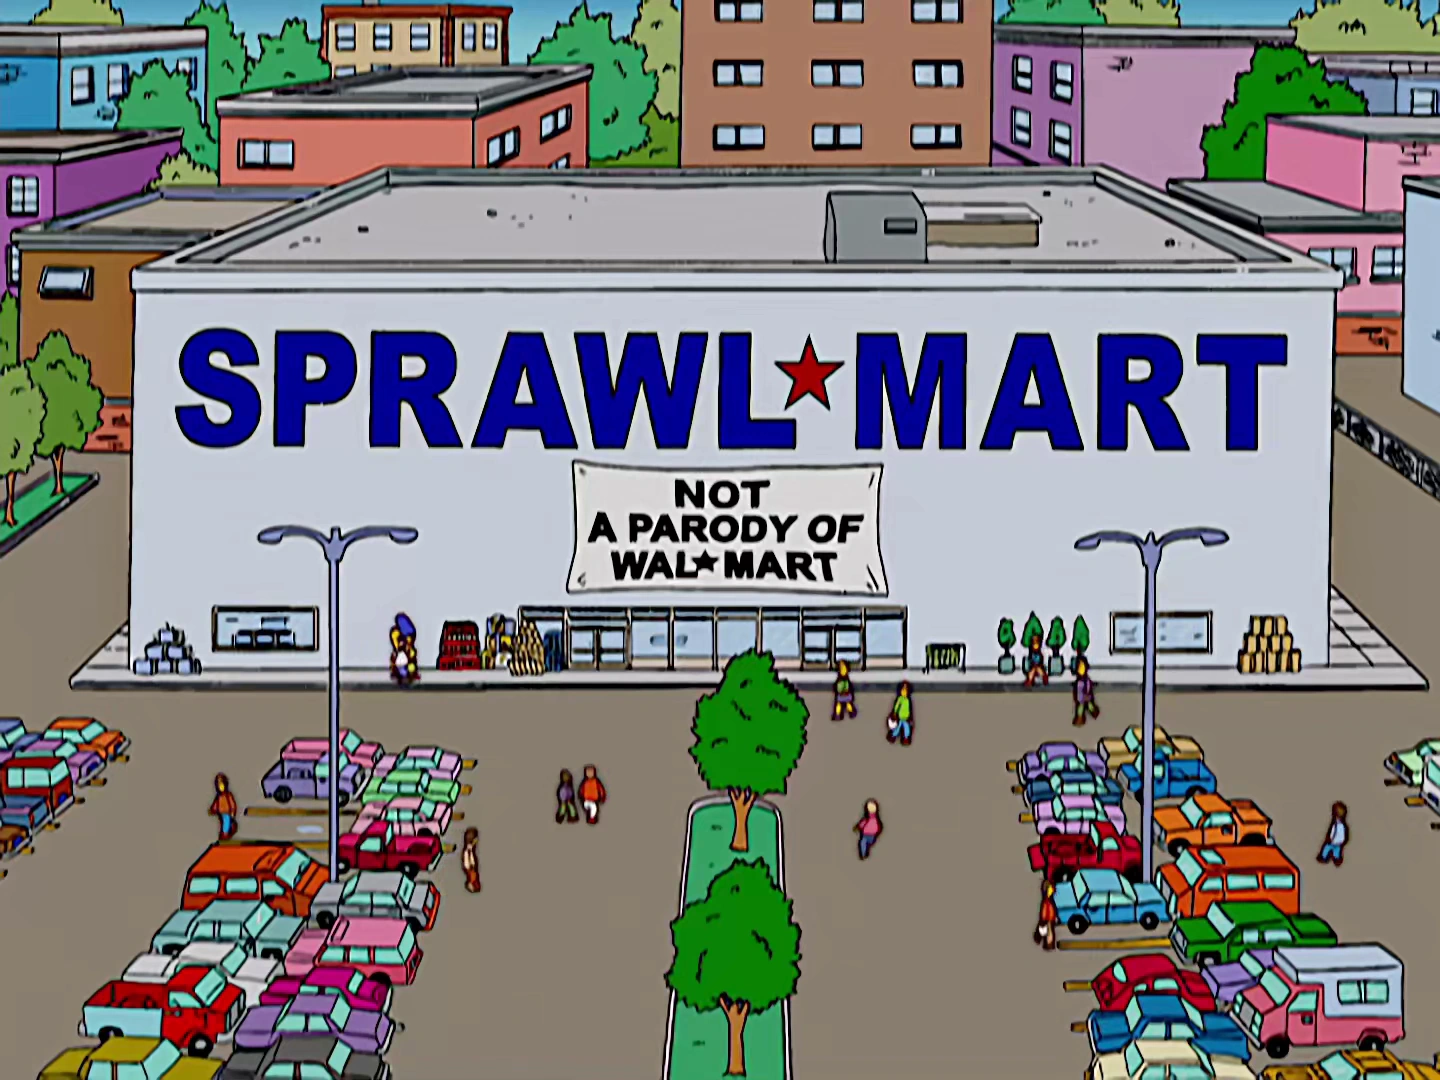

In [5]:
# Load the image
Image(filename='Sprawl Mart.jpg', width=1000)

In [6]:
df = pd.read_csv('Different_stores_data_V2.csv')

In [7]:
df.head()

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,total_profit,payment_method,region,state,shopping_mall
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,375.100,Credit Card,South,Kentucky,Kanyon
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,540.153,Debit Card,South,Kentucky,Viaport Outlet
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,5.020,Cash,West,California,Metrocity
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,500.425,Credit Card,South,Florida,Metropol AVM
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,60.600,Cash,South,Florida,Kanyon


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   invoice_no              99457 non-null  object 
 1   invoice_date            99457 non-null  object 
 2   customer_id             99457 non-null  object 
 3   gender                  99457 non-null  object 
 4   age                     99457 non-null  int64  
 5   category                99457 non-null  object 
 6   quantity                99457 non-null  int64  
 7   selling_price_per_unit  99457 non-null  float64
 8   total_profit            99457 non-null  float64
 9   payment_method          99457 non-null  object 
 10  region                  99457 non-null  object 
 11  state                   99457 non-null  object 
 12  shopping_mall           99457 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 9.9+ MB


In [9]:
# Missing Values
df.isnull().sum()

invoice_no                0
invoice_date              0
customer_id               0
gender                    0
age                       0
category                  0
quantity                  0
selling_price_per_unit    0
total_profit              0
payment_method            0
region                    0
state                     0
shopping_mall             0
dtype: int64

In [10]:
# Descriptive Stat
df.describe()

,age,quantity,selling_price_per_unit,total_profit
count,99457.000000,99457.000000,99457.000000,99457.000000
mean,43.427089,3.004424,689.256321,230.751516
std,14.990054,1.415237,941.184567,425.077533
min,18.000000,1.000000,5.230000,-2625.000000
25%,30.000000,2.000000,45.450000,20.920000
50%,43.000000,3.000000,203.300000,94.687500
75%,56.000000,4.000000,1200.320000,300.080000
max,69.000000,15.000000,5250.000000,7087.500000


In [11]:
# bin age group

# Define age bins and labels
bins = [10, 20, 30, 40, 50, 60, 70]
labels = ['10s', '20s', '30s', '40s', '50s', '60s']

# Create a new column for age groups
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Count occurrences for each age group
age_group_counts = df['age_group'].value_counts().sort_index()

age_group_counts

age_group
10s     3780
20s    19263
30s    19287
40s    19153
50s    18931
60s    19043
Name: count, dtype: int64

In [12]:
'''
Min age is 18
Max age is 69
'''

'\nMin age is 18\nMax age is 69\n'

In [13]:
# Convert & Extract Date Time

# Convert invoice_date to datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

# Extract time components
df['hour'] = df['invoice_date'].dt.hour
df['day'] = df['invoice_date'].dt.day
df['month'] = df['invoice_date'].dt.month
df['year'] = df['invoice_date'].dt.year
df['day_of_week'] = df['invoice_date'].dt.day_name()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   invoice_no              99457 non-null  object        
 1   invoice_date            99457 non-null  datetime64[ns]
 2   customer_id             99457 non-null  object        
 3   gender                  99457 non-null  object        
 4   age                     99457 non-null  int64         
 5   category                99457 non-null  object        
 6   quantity                99457 non-null  int64         
 7   selling_price_per_unit  99457 non-null  float64       
 8   total_profit            99457 non-null  float64       
 9   payment_method          99457 non-null  object        
 10  region                  99457 non-null  object        
 11  state                   99457 non-null  object        
 12  shopping_mall           99457 non-null  object

# Analysis

In [15]:
# Function to plot total profit by column
def plot_total_profit_in_column(df, column):
    profit_by_dim = df.groupby(column)['total_profit'].sum().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=profit_by_dim.index, y=profit_by_dim.values)
    plt.title(f'Total Profit by {column.capitalize()}')
    plt.ylabel('Total Profit')
    plt.xlabel(column.capitalize())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


def plot_stacked_bar_graph(col1, col2):
    # Prepare the data for the stacked bar chart
    payment_category_data = df.groupby([col1, col2]).size().unstack()

    # Plot the stacked bar chart
    payment_category_data.plot(kind='bar', stacked=True, figsize=(10, 6))

    # Add labels and title
    plt.title(f"Stacked Bar Graph of '{col1}' vs '{col2}'")
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    # Show the plot
    plt.show()

## Age Group

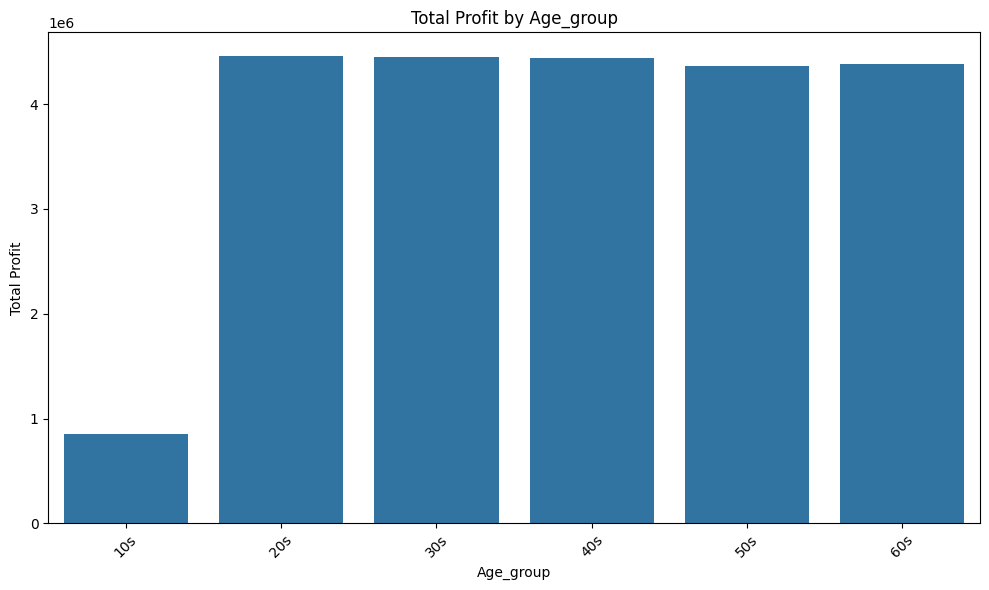

In [16]:
plot_total_profit_in_column(df, 'age_group')

## Gender

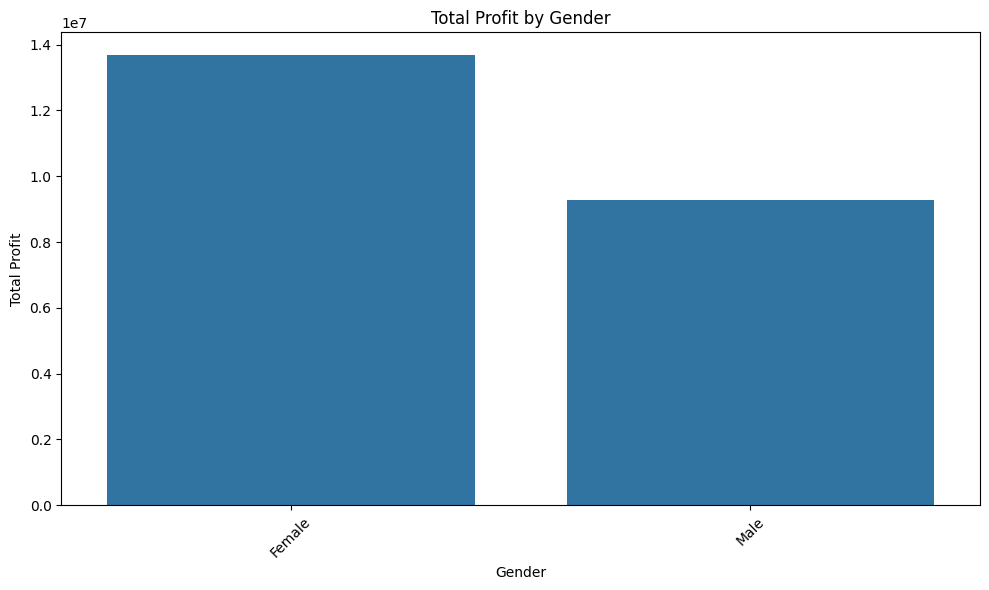

In [17]:
plot_total_profit_in_column(df, 'gender')

## Category

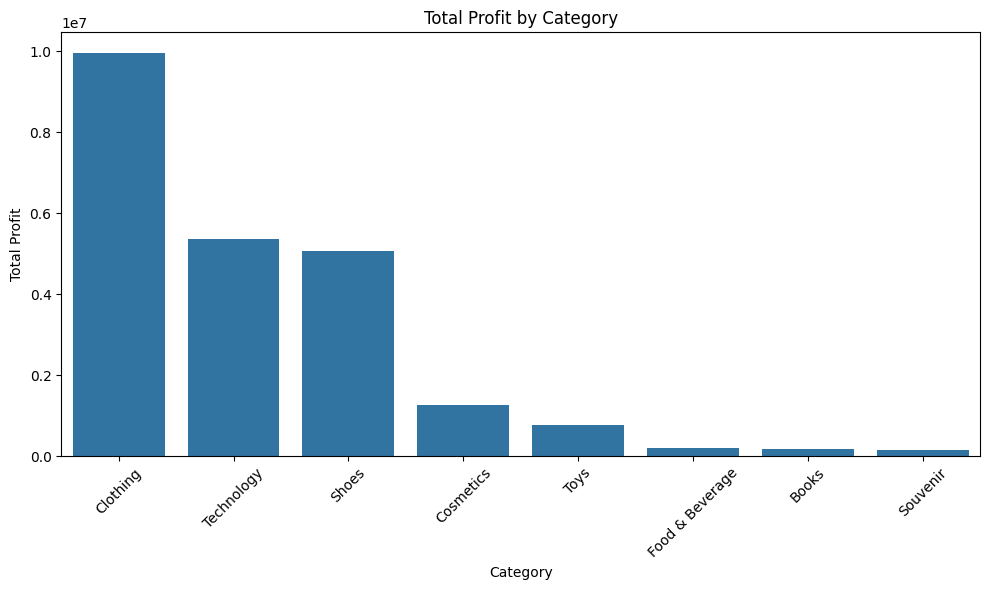

In [18]:
plot_total_profit_in_column(df, 'category')

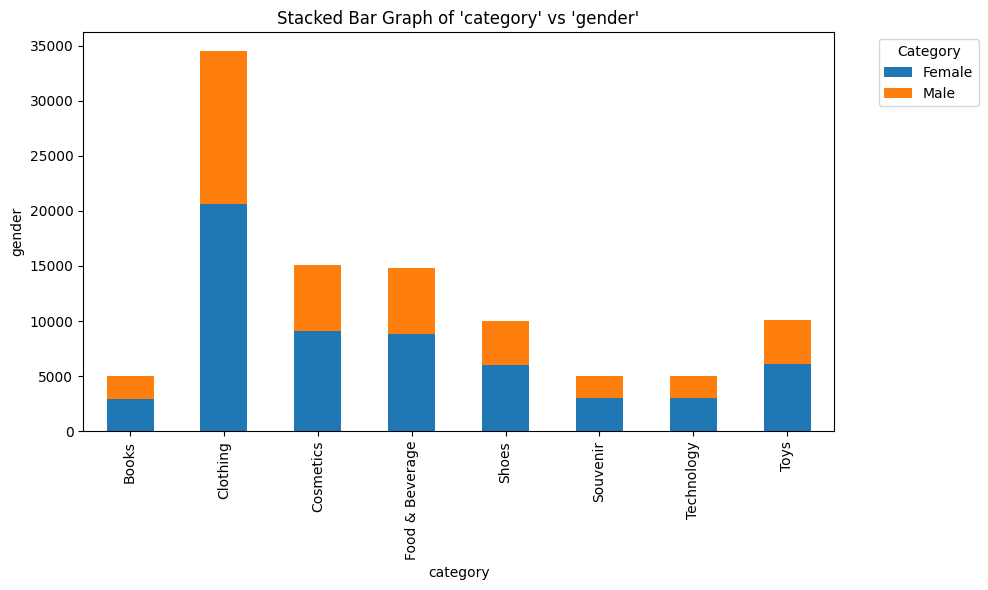

In [19]:
plot_stacked_bar_graph('category','gender')

## Payment Method

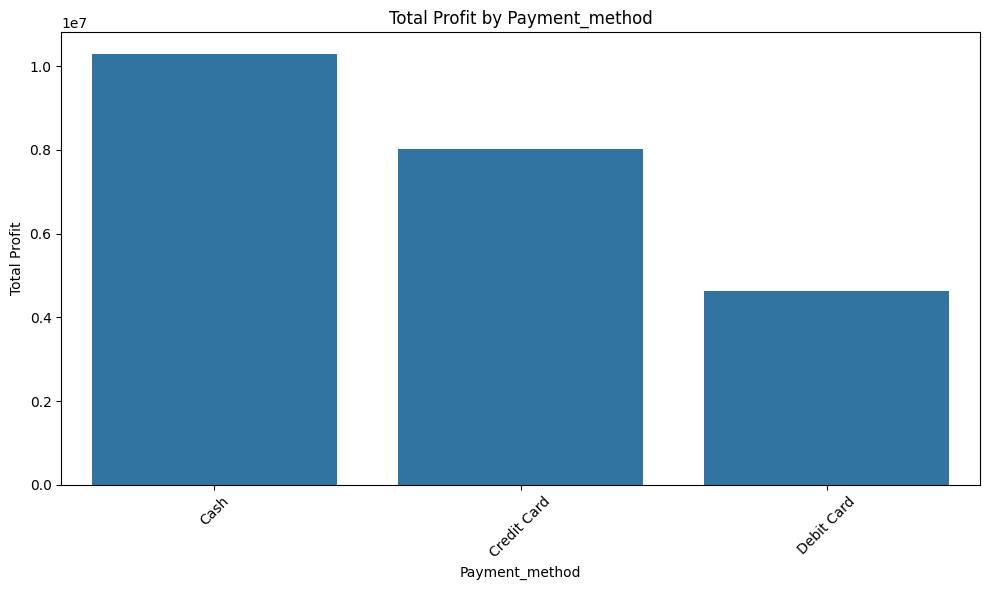

In [20]:
plot_total_profit_in_column(df, 'payment_method')

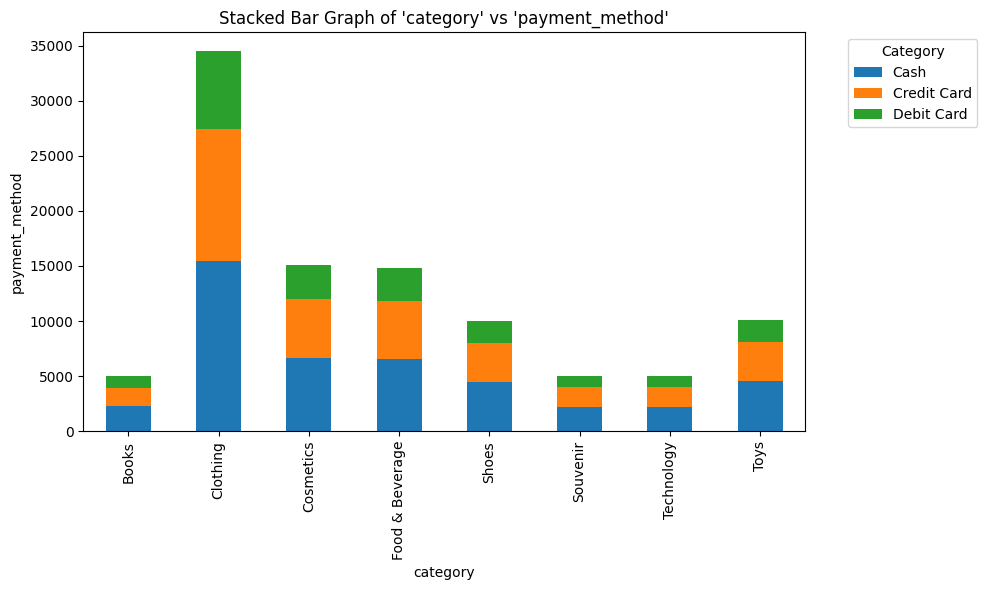

In [45]:
plot_stacked_bar_graph('category','payment_method')

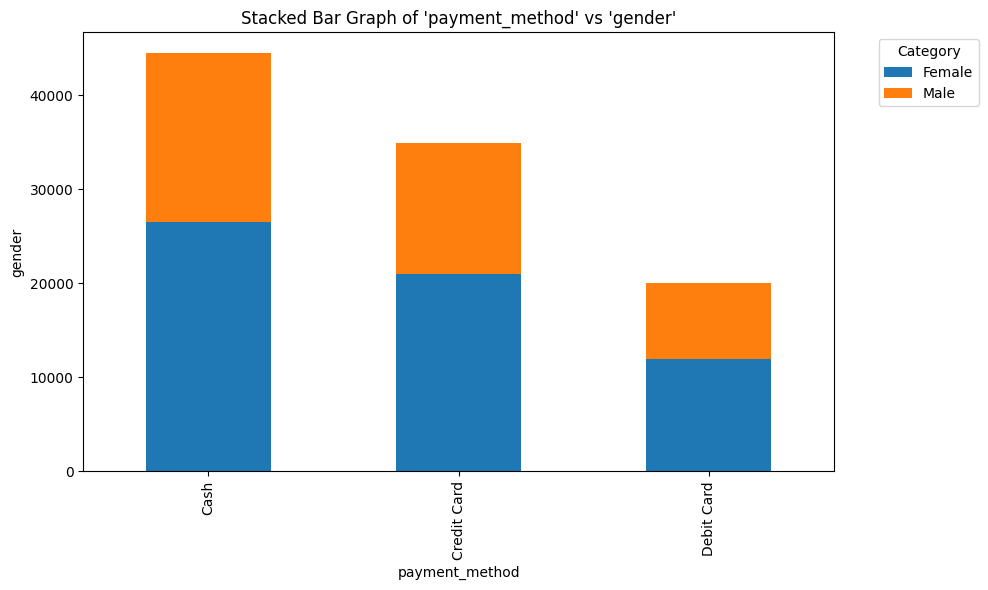

In [22]:
plot_stacked_bar_graph('payment_method','gender')

## Region

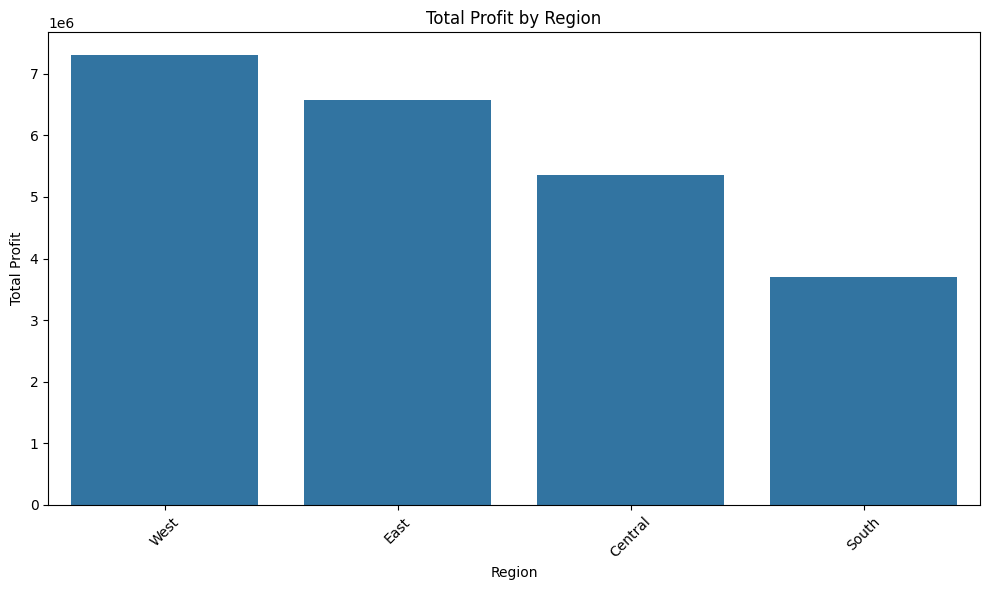

In [23]:
plot_total_profit_in_column(df, 'region')

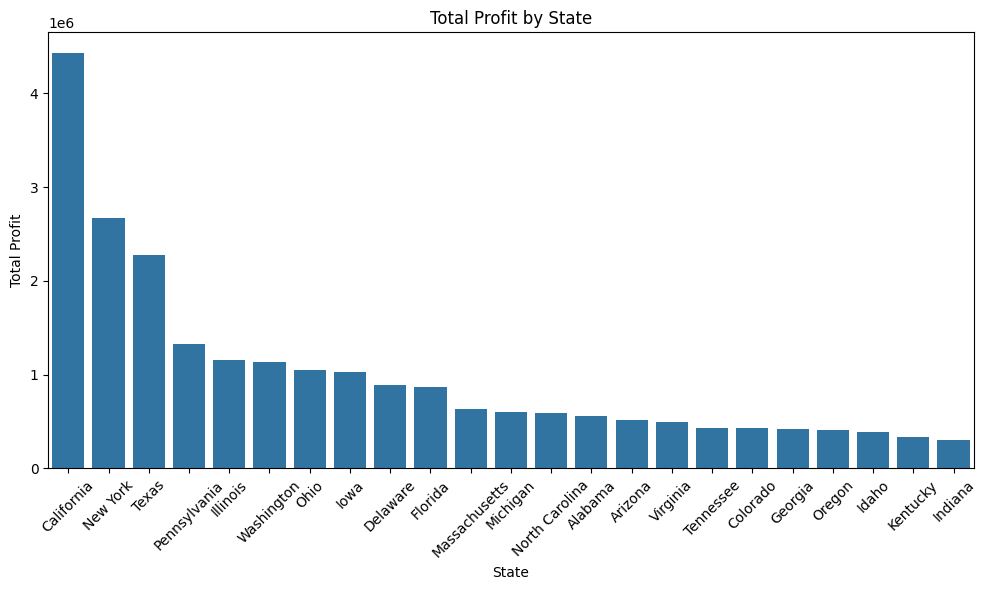

In [24]:
plot_total_profit_in_column(df, 'state')

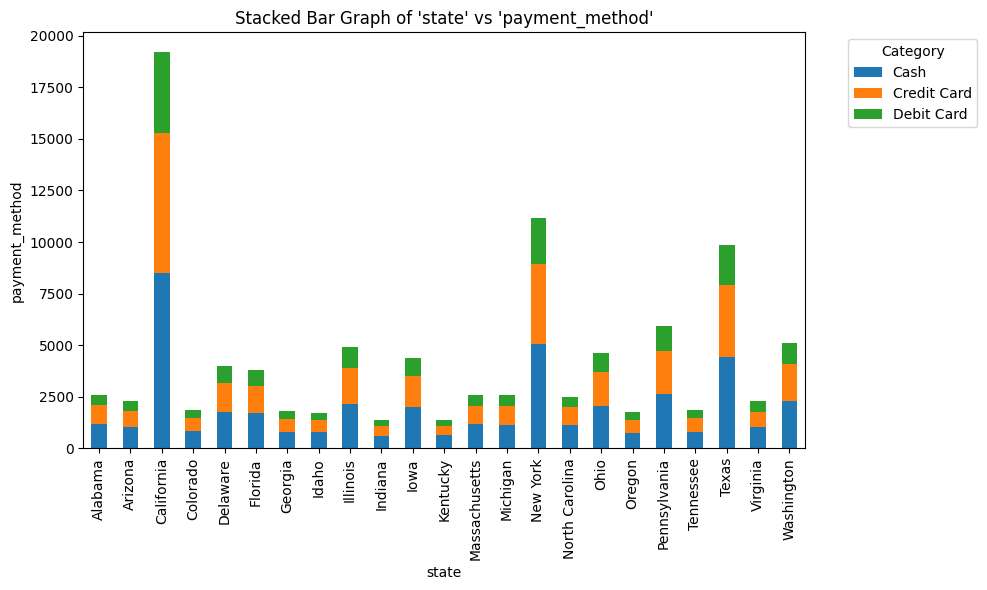

In [25]:
plot_stacked_bar_graph('state','payment_method')

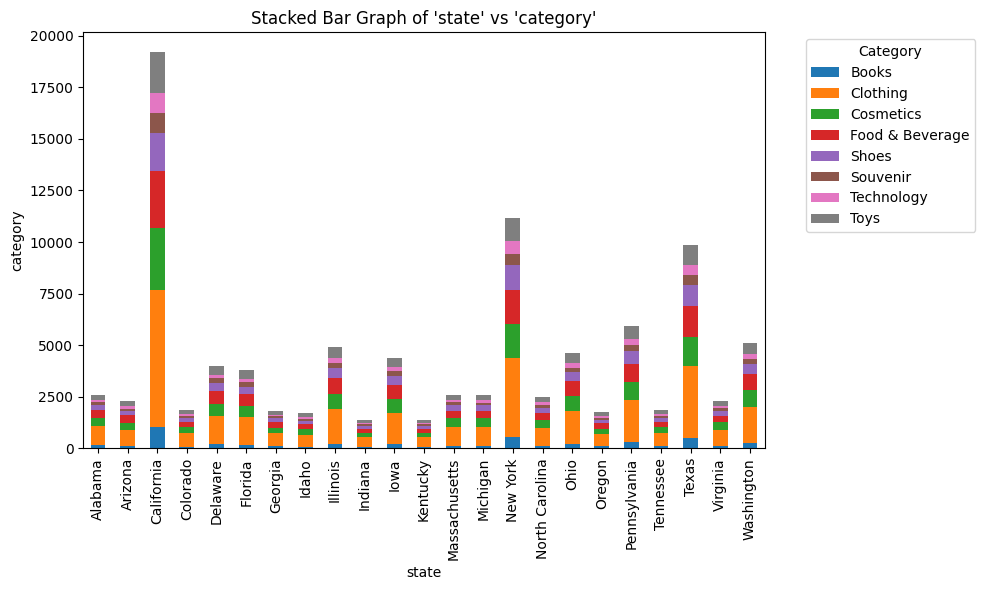

In [26]:
plot_stacked_bar_graph('state','category')

## Hour

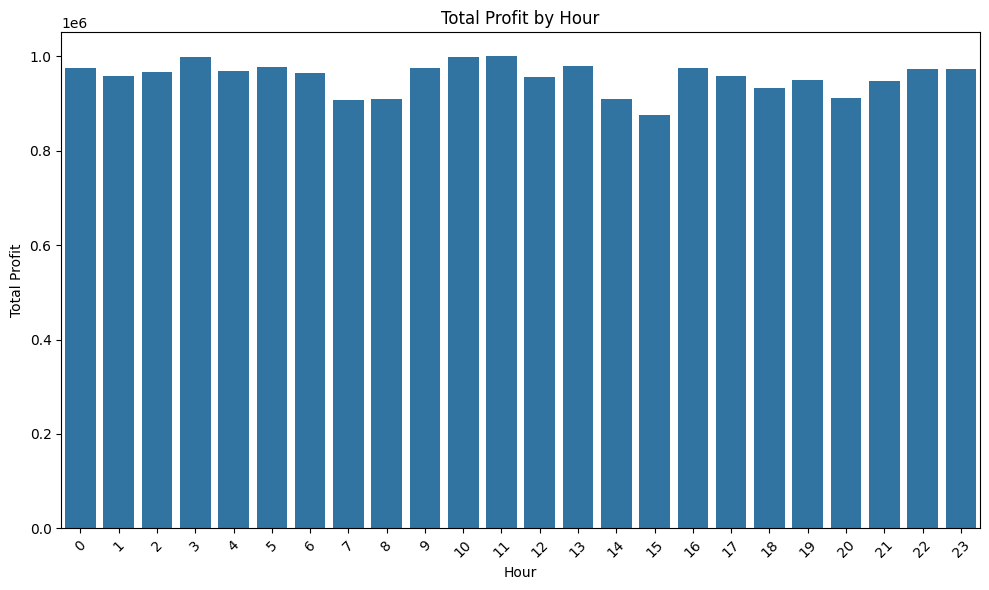

In [27]:
plot_total_profit_in_column(df, 'hour')

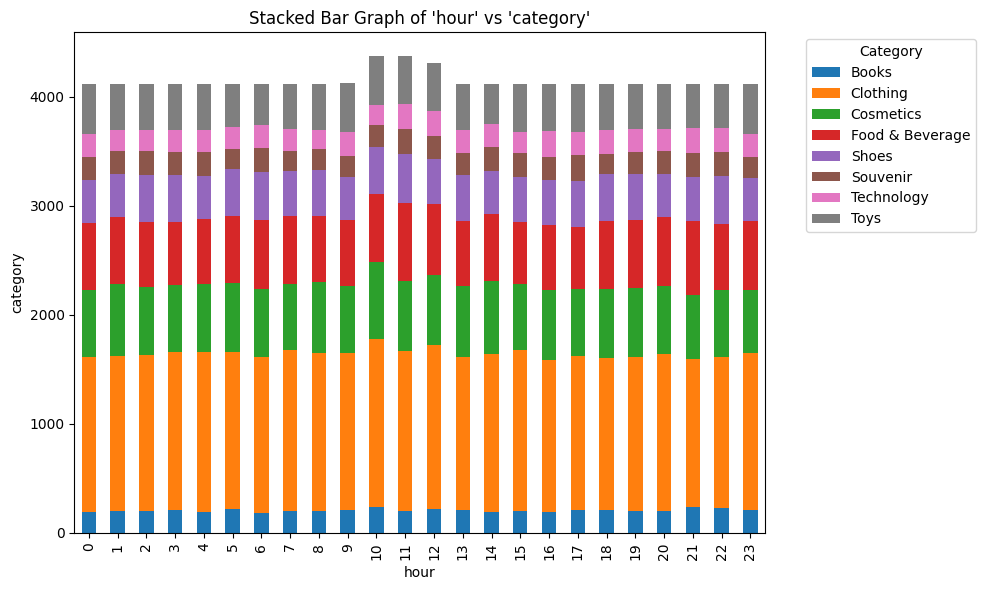

In [28]:
plot_stacked_bar_graph('hour','category')

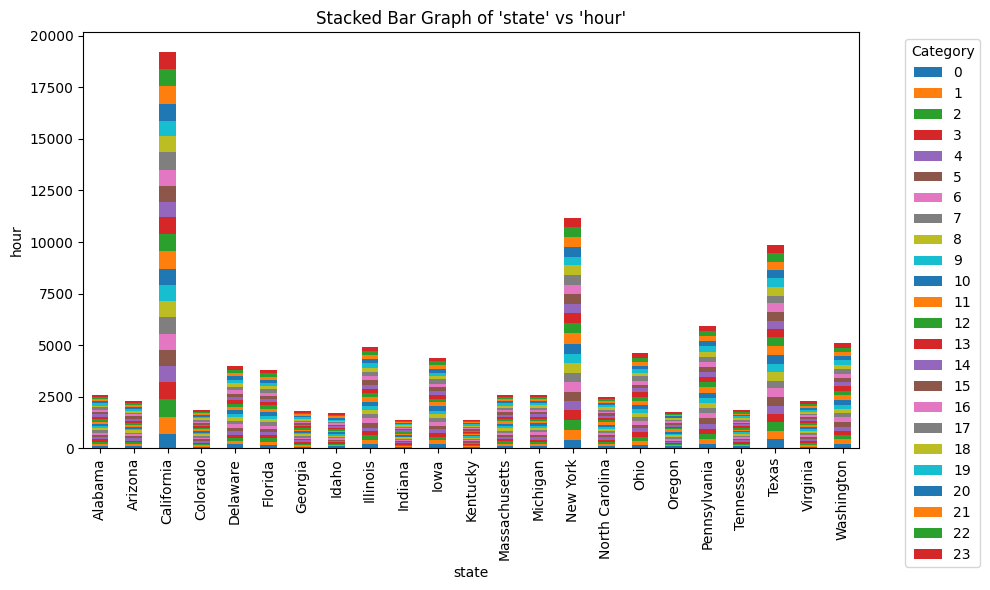

In [29]:
plot_stacked_bar_graph('state','hour')

## Day of the week

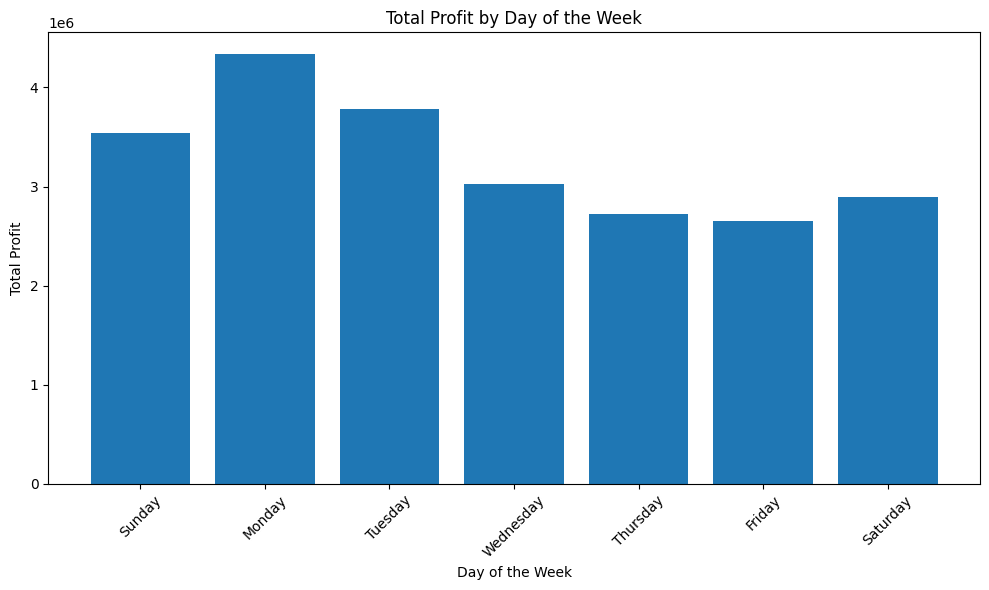

In [44]:
# Define the order of days
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Calculate total profit grouped by day of the week
profit_by_day = df.groupby('day_of_week')['total_profit'].sum().reindex(day_order)

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(profit_by_day.index, profit_by_day.values)  # Plot total profit
plt.xlabel('Day of the Week')
plt.ylabel('Total Profit')
plt.title('Total Profit by Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

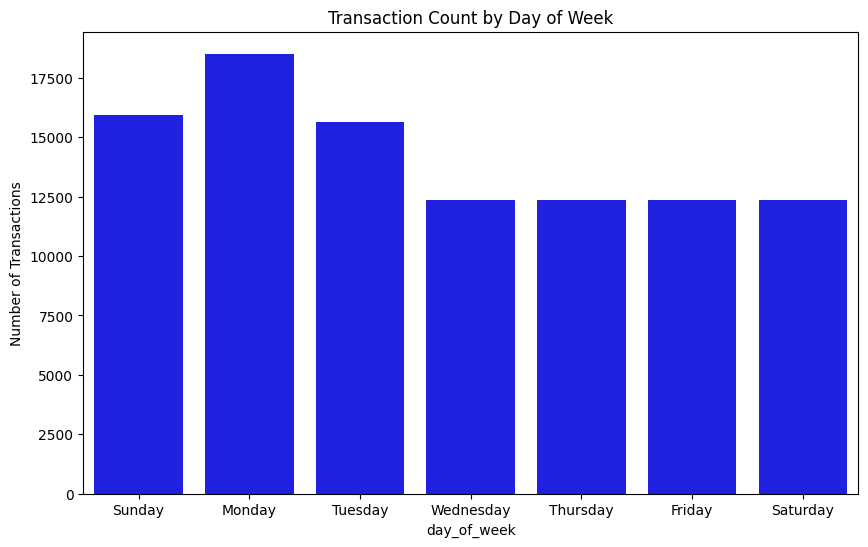

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=df, color='blue')  # Removed 'palette' argument
plt.title('Transaction Count by Day of Week')
plt.xlabel('day_of_week')
plt.ylabel('Number of Transactions')
plt.show()

## Descriptive Analysis of each categories price per unit

In [34]:
price_per_unit_stat = df.groupby('category')[['selling_price_per_unit']].describe()

price_per_unit_stat

selling_price_per_unit                                     \
                                 count         mean          std      min   
category                                                                    
Books                           4981.0    45.568621    21.492662    15.15   
Clothing                       34487.0   901.084021   424.225594   300.08   
Cosmetics                      15097.0   122.448626    57.458097    40.66   
Food & Beverage                14776.0    15.671948     7.422176     5.23   
Shoes                          10034.0  1807.388568   845.116269   600.17   
Souvenir                        4999.0    34.894345    16.564498    11.73   
Technology                      4996.0  3156.935548  1481.559805  1050.00   
Toys                           10087.0   107.733185    50.364844    35.84   

                                                     
                     25%      50%      75%      max  
category                                             
Books              30.30    45.45    60.60    75.75  
Clothing          600.16   900.24  1200.32  1500.40  
Cosmetics          81.32   121.98   162.64   203.30  
Food & Beverage    10.46    15.69    20.92    26.15  
Shoes            1200.34  1800.51  2400.68  3000.85  
Souvenir           23.46    35.19    46.92    58.65  
Technology       2100.00  3150.00  4200.00  5250.00  
Toys               71.68   107.52   143.36   179.20

<Figure size 1200x800 with 0 Axes>

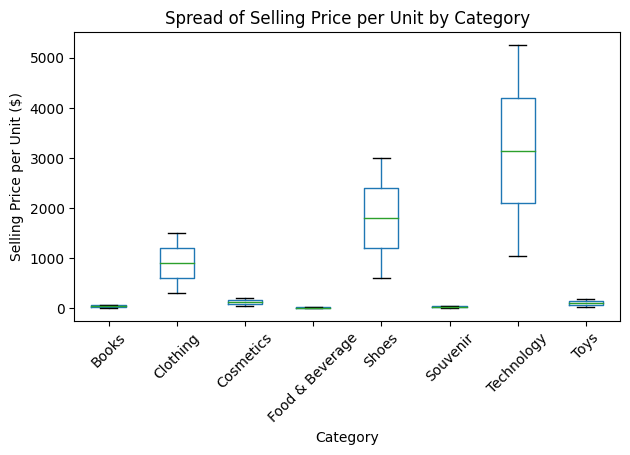

In [37]:
plt.figure(figsize=(12, 8))
df.boxplot(column='selling_price_per_unit', by='category', grid=False, showfliers=True)
plt.title('Spread of Selling Price per Unit by Category')
plt.suptitle('')  # Remove the default matplotlib title
plt.xlabel('Category')
plt.ylabel('Selling Price per Unit ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Descriptive Analysis of each categories quantity in one purpose

In [35]:
quantity_stat = df.groupby('category')[['quantity']].describe()

quantity_stat

quantity                                              
                   count      mean       std  min  25%  50%  75%   max
category                                                              
Books             4981.0  3.009235  1.420135  1.0  2.0  3.0  4.0   8.0
Clothing         34487.0  3.003973  1.415899  1.0  2.0  3.0  4.0  11.0
Cosmetics        15097.0  3.013910  1.418822  1.0  2.0  3.0  4.0  12.0
Food & Beverage  14776.0  2.996819  1.419155  1.0  2.0  3.0  4.0   5.0
Shoes            10034.0  3.011461  1.408128  1.0  2.0  3.0  4.0   5.0
Souvenir          4999.0  2.974795  1.412148  1.0  2.0  3.0  4.0   5.0
Technology        4996.0  3.009007  1.421175  1.0  2.0  3.0  4.0  15.0
Toys             10087.0  3.005948  1.405269  1.0  2.0  3.0  4.0   5.0

<Figure size 1200x800 with 0 Axes>

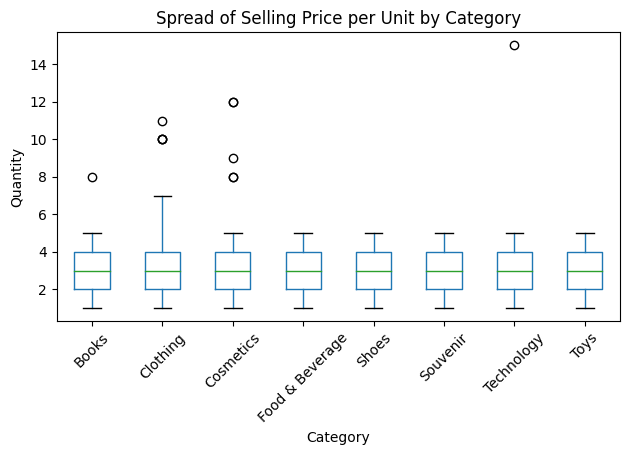

In [38]:
plt.figure(figsize=(12, 8))
df.boxplot(column='quantity', by='category', grid=False, showfliers=True)
plt.title('Spread of Selling Price per Unit by Category')
plt.suptitle('')  # Remove the default matplotlib title
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()